# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from  sklearn  import  set_config
set_config(display='diagram')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

# Custom functions

In [4]:
def accuracy_performance(model, X, y):
    accuracy = round(model.score(X,y),3)
    return pd.DataFrame({'model':[str(model)], 'accuracy':[accuracy]})

In [5]:
def classification_analysis(df):
    df['model'] = df['model'].apply(lambda x: x.split('(')[0])
    
    fig = plt.figure(figsize=(11, 5))
    sns.barplot(x='model', y='accuracy', data=df)
    plt.ylim(0, 1)
    plt.xlabel('')
    plt.ylabel('accuracy', fontsize=14)
    plt.xticks(rotation=60, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', linewidth=0.8)

    plt.show()
    return df

In [6]:
def classificator_performance(model, X_test, y_test, target_names):
    y_pred = model.predict(X_test)
    return print(classification_report(y_test, y_pred, target_names=target_names))  

In [7]:
def classificator_analysis(model, X_test, y_test, labels_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    y_pred_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    labels = list(labels_name.values())

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=labels, yticklabels=labels, ax=axs[0])
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('True')

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(model.classes_.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        sns.lineplot(x=fpr[i], y=tpr[i], label='ROC curve (class {0}) (AUC = {1:0.2f})'.format(labels_name[i], roc_auc[i]), linewidth=1.5, ax=axs[1])
    
    axs[1].set_xlim([0.0, 1.0])
    axs[1].set_ylim([0.0, 1.05])
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].legend(loc="lower right")

    # Plot Precision-Recall curve
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(model.classes_.shape[0]):
        precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
        average_precision[i] = average_precision_score(y_test == i, y_pred_proba[:, i])
        sns.lineplot(x=recall[i], y=precision[i], label='Precision-recall curve (class {0}) (AP = {1:0.2f})'.format(labels_name[i], average_precision[i]), linewidth=1.5, ax=axs[2])
    
    axs[2].set_xlim([0.0, 1.0])
    axs[2].set_ylim([0.0, 1.05])
    axs[2].set_xlabel('Recall')
    axs[2].set_ylabel('Precision')
    axs[2].legend(loc="lower left")

    return plt.show()

In [8]:
def features_importance(model, X_test, y_test, n_repeats):
    result = permutation_importance(estimator=model,X=X_test, y=y_test, n_repeats=n_repeats, n_jobs=-1, random_state=13)
    features_rank  = pd.DataFrame(result['importances'].T,  columns=data_frame.columns[:-1])
    
    plt.figure(figsize=(10, 7))
    plt.title(str(model))
    plt.grid(axis='x', linestyle='--', linewidth=0.8)
    sns.barplot(data=features_rank, orient='h')
    
    return  plt.show()

In [9]:
def cross_validation(model, X, y, cv):
    r = cross_validate(model, X, y, cv=cv, scoring=('accuracy'), return_train_score=True, n_jobs=-1)
    r2_test_mean = round(r['test_score'].mean(),3)
    r2_train_mean = round(r['train_score'].mean(),3)
    r2_test_min = round(r['test_score'].min(),3)
    r2_train_min = round(r['train_score'].min(),3)
    r2_test_max = round(r['test_score'].max(),3)
    r2_train_max = round(r['train_score'].max(),3)    
    data = pd.DataFrame(r)
    data = data[['test_score', 'train_score']]
    
    sns.barplot(data=data)
    plt.grid(axis='y', linestyle='--', linewidth=0.8)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.ylabel('accuracy')
   
    print('test accuracy score: worst={0}, best={1}, avarage={2}'.format(r2_test_min,r2_test_max,r2_test_mean))
    print('train accuracy score: worst={0}, best={1}, avarage={2}'.format(r2_train_min,r2_train_max,r2_train_mean))
   
    return plt.show()

# Loading data

In [10]:
with open('penguins_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [11]:
X, y = data

In [12]:
with open('penguins_df_processed.pkl', 'rb') as f:
    data_frame = pickle.load(f)

In [13]:
df = data_frame

In [14]:
df

,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,0.0,0.0,1.0,0.0,1.0,-0.896042,0.780732,-1.426752,-0.568475,0
1,0.0,0.0,1.0,1.0,0.0,-0.822788,0.119584,-1.069474,-0.506286,0
2,0.0,0.0,1.0,1.0,0.0,-0.676280,0.424729,-0.426373,-1.190361,0
3,0.0,0.0,1.0,1.0,0.0,-1.335566,1.085877,-0.569284,-0.941606,0
4,0.0,0.0,1.0,0.0,1.0,-0.859415,1.747026,-0.783651,-0.692852,0
...,...,...,...,...,...,...,...,...,...,...
328,1.0,0.0,0.0,1.0,0.0,0.587352,-1.762145,0.931283,0.892957,2
329,1.0,0.0,0.0,1.0,0.0,0.514098,-1.457000,1.002739,0.799674,2
330,1.0,0.0,0.0,0.0,1.0,1.173384,-0.744994,1.502928,1.919069,2
331,1.0,0.0,0.0,1.0,0.0,0.221082,-1.202712,0.788372,1.234995,2


In [15]:
with open('penguins_species_classes.pkl', 'rb') as f:
    target_classes = pickle.load(f)

In [16]:
target_classes

{0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

# Setup classification models

In [17]:
model_LG = LogisticRegression()
model_LG.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [18]:
model_SVC = SVC(probability=True)
model_SVC.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [19]:
model_KNC = KNeighborsClassifier()
model_KNC.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [20]:
model_GNB = GaussianNB()
model_GNB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [21]:
model_DTC = DecisionTreeClassifier()
model_DTC.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [22]:
model_MLPC = MLPClassifier()
model_MLPC.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [23]:
model_RFC = RandomForestClassifier()
model_RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
model_ABC = AdaBoostClassifier()
model_ABC.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [25]:
model_GBC = GradientBoostingClassifier()
model_GBC.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [26]:
model_DC= DummyClassifier(strategy='stratified')
model_DC.get_params()

{'constant': None, 'random_state': None, 'strategy': 'stratified'}

# Training models

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [28]:
model_LG.fit(X_train, y_train)

LogisticRegression()

In [29]:
model_SVC.fit(X_train, y_train)

SVC(probability=True)

In [30]:
model_KNC.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
model_GNB.fit(X_train, y_train)

GaussianNB()

In [32]:
model_DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
model_MLPC.fit(X_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [34]:
model_RFC.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
model_ABC.fit(X_train, y_train)

AdaBoostClassifier()

In [36]:
model_GBC.fit(X_train, y_train)

GradientBoostingClassifier()

In [37]:
model_DC.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

# Accuracy score for Train and Test dataset

In [38]:
model_LG_train = accuracy_performance(model_LG, X_train, y_train)
model_LG_test = accuracy_performance(model_LG, X_test, y_test)

In [39]:
model_LG_train.insert(1, 'data', 'train')
model_LG_test.insert(1, 'data', 'test')
results = pd.concat([model_LG_train, model_LG_test], ignore_index=True)

In [40]:
model_SVC_train = accuracy_performance(model_SVC, X_train, y_train)
model_SVC_test = accuracy_performance(model_SVC, X_test, y_test)

In [41]:
model_SVC_train.insert(1, 'data', 'train')
model_SVC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_SVC_train, model_SVC_test], ignore_index=True)

In [42]:
model_KNC_train = accuracy_performance(model_KNC, X_train, y_train)
model_KNC_test = accuracy_performance(model_KNC, X_test, y_test)

In [43]:
model_KNC_train.insert(1, 'data', 'train')
model_KNC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_KNC_train, model_KNC_test], ignore_index=True)

In [44]:
model_GNB_train = accuracy_performance(model_GNB, X_train, y_train)
model_GNB_test = accuracy_performance(model_GNB, X_test, y_test)

In [45]:
model_GNB_train.insert(1, 'data', 'train')
model_GNB_test.insert(1, 'data', 'test')
results = pd.concat([results, model_GNB_train, model_GNB_test], ignore_index=True)

In [46]:
model_DTC_train = accuracy_performance(model_DTC, X_train, y_train)
model_DTC_test = accuracy_performance(model_DTC, X_test, y_test)

In [47]:
model_DTC_train.insert(1, 'data', 'train')
model_DTC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_DTC_train, model_DTC_test], ignore_index=True)

In [48]:
model_MLPC_train = accuracy_performance(model_MLPC, X_train, y_train)
model_MLPC_test = accuracy_performance(model_MLPC, X_test, y_test)

In [49]:
model_MLPC_train.insert(1, 'data', 'train')
model_MLPC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_MLPC_train, model_MLPC_test], ignore_index=True)

In [50]:
model_RFC_train = accuracy_performance(model_RFC, X_train, y_train)
model_RFC_test = accuracy_performance(model_RFC, X_test, y_test)

In [51]:
model_RFC_train.insert(1, 'data', 'train')
model_RFC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_RFC_train, model_RFC_test], ignore_index=True)

In [52]:
model_GBC_train = accuracy_performance(model_GBC, X_train, y_train)
model_GBC_test = accuracy_performance(model_GBC, X_test, y_test)

In [53]:
model_GBC_train.insert(1, 'data', 'train')
model_GBC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_GBC_train, model_GBC_test], ignore_index=True)

In [54]:
model_ABC_train = accuracy_performance(model_ABC, X_train, y_train)
model_ABC_test = accuracy_performance(model_ABC, X_test, y_test)

In [55]:
model_ABC_train.insert(1, 'data', 'train')
model_ABC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_ABC_train, model_ABC_test], ignore_index=True)

In [56]:
model_DC_train = accuracy_performance(model_DC, X_train, y_train)
model_DC_test = accuracy_performance(model_DC, X_test, y_test)

In [57]:
model_DC_train.insert(1, 'data', 'train')
model_DC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_DC_train, model_DC_test], ignore_index=True)

In [58]:
results

,model,data,accuracy
0,LogisticRegression(),train,1.000
1,LogisticRegression(),test,1.000
2,SVC(probability=True),train,0.996
3,SVC(probability=True),test,1.000
4,KNeighborsClassifier(),train,0.996
5,KNeighborsClassifier(),test,1.000
6,GaussianNB(),train,0.717
7,GaussianNB(),test,0.690
8,DecisionTreeClassifier(),train,1.000
9,DecisionTreeClassifier(),test,1.000


# Accuracy rank for classification models test

In [59]:
df_results = results[(results['data'] != 'train')]
df_results = df_results.sort_values(by='accuracy', ascending=False)
df_results = df_results.reset_index(drop=True)
df_results.index = df_results.index + 1

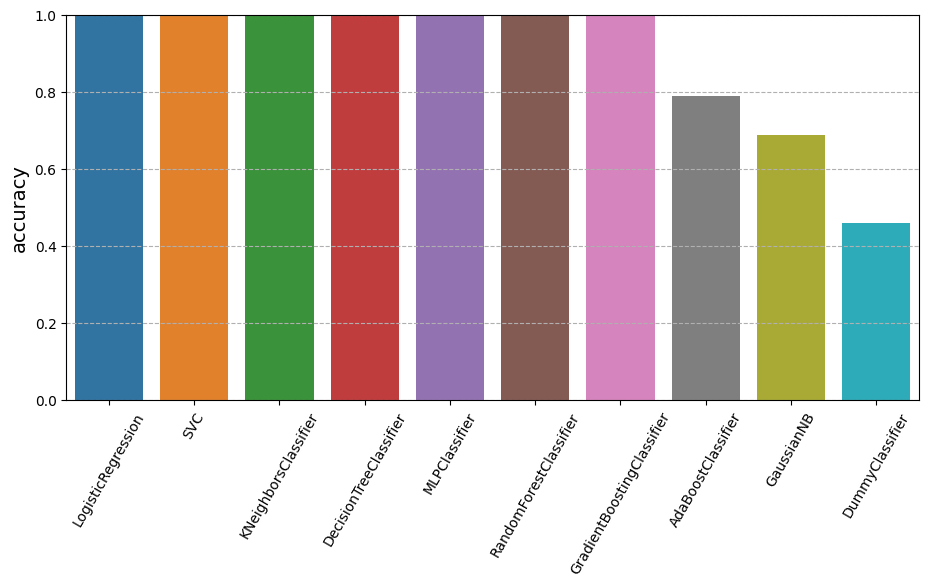

,model,data,accuracy
1,LogisticRegression,test,1.00
2,SVC,test,1.00
3,KNeighborsClassifier,test,1.00
4,DecisionTreeClassifier,test,1.00
5,MLPClassifier,test,1.00
6,RandomForestClassifier,test,1.00
7,GradientBoostingClassifier,test,1.00
8,AdaBoostClassifier,test,0.79
9,GaussianNB,test,0.69
10,DummyClassifier,test,0.46


In [60]:
classification_analysis(df_results)

# Pecision and Recall scores analysis

In [61]:
classificator_performance(model_LG, X_train, y_train, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        99
   Chinstrap       1.00      1.00      1.00        48
      Gentoo       1.00      1.00      1.00        86

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [62]:
classificator_performance(model_LG, X_test, y_test, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        47
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



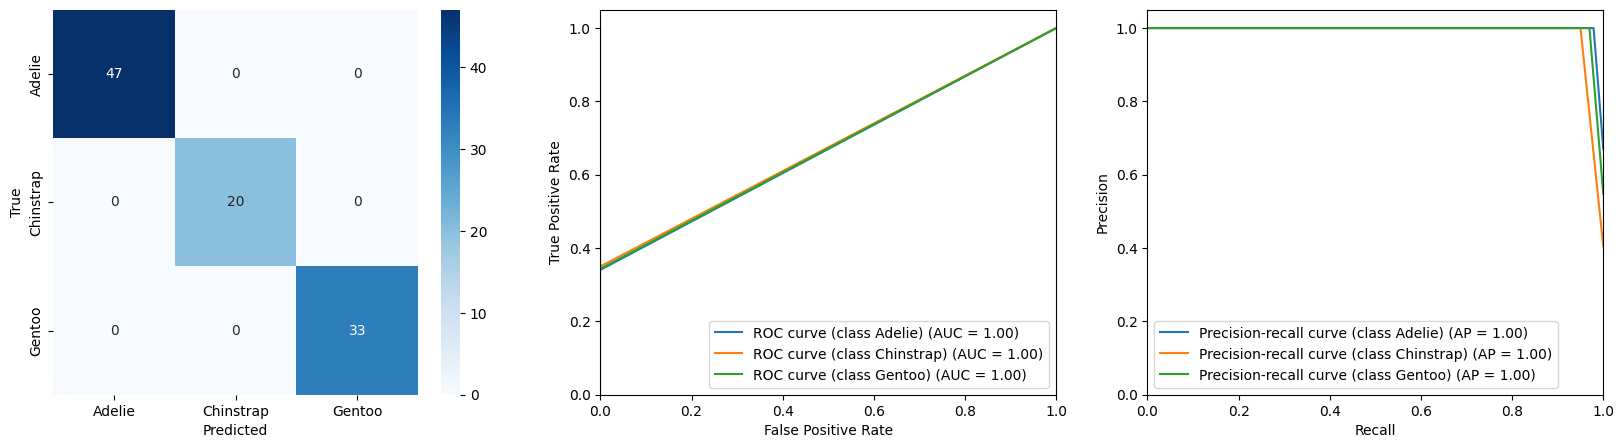

In [63]:
classificator_analysis(model=model_LG, X_test=X_test, y_test=y_test, labels_name=target_classes)

In [64]:
classificator_performance(model_KNC, X_train, y_train, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      0.99      0.99        99
   Chinstrap       0.98      1.00      0.99        48
      Gentoo       1.00      1.00      1.00        86

    accuracy                           1.00       233
   macro avg       0.99      1.00      0.99       233
weighted avg       1.00      1.00      1.00       233



In [65]:
classificator_performance(model_KNC, X_test, y_test, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        47
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



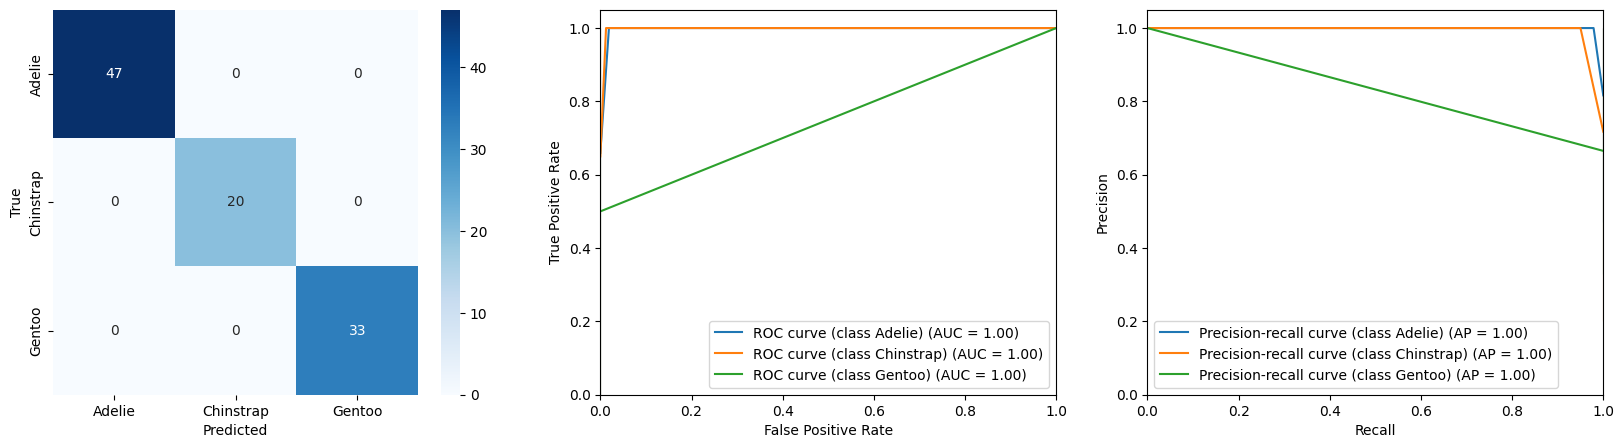

In [66]:
classificator_analysis(model=model_KNC, X_test=X_test, y_test=y_test, labels_name=target_classes)

In [67]:
classificator_performance(model_SVC, X_train, y_train, target_classes.values())

              precision    recall  f1-score   support

      Adelie       0.99      1.00      0.99        99
   Chinstrap       1.00      0.98      0.99        48
      Gentoo       1.00      1.00      1.00        86

    accuracy                           1.00       233
   macro avg       1.00      0.99      0.99       233
weighted avg       1.00      1.00      1.00       233



In [68]:
classificator_performance(model_SVC, X_test, y_test, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        47
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



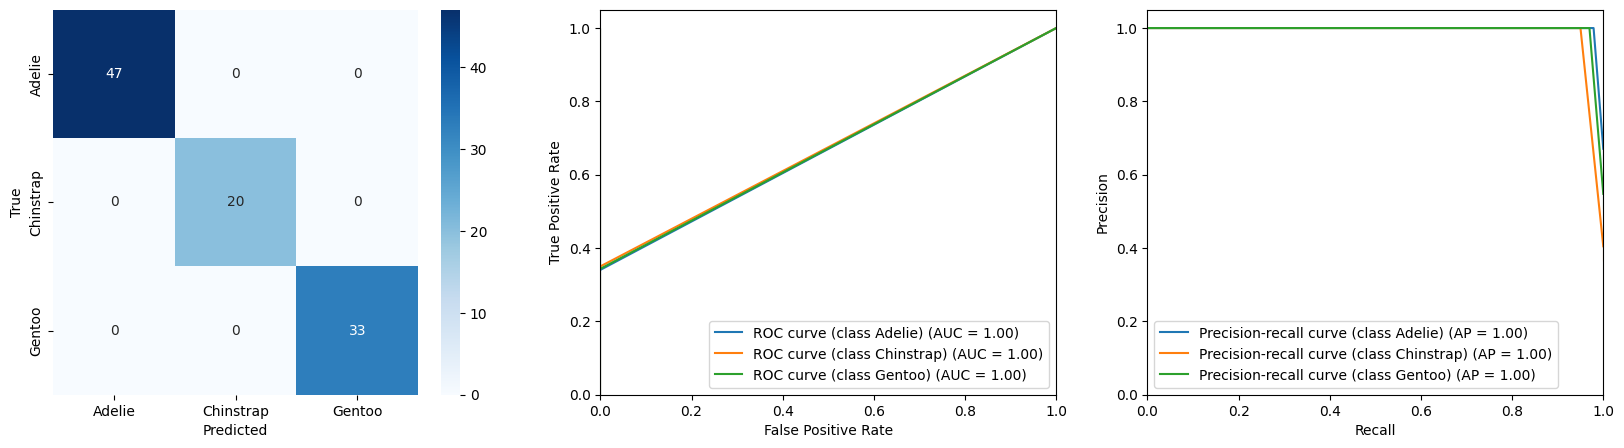

In [69]:
classificator_analysis(model=model_SVC, X_test=X_test, y_test=y_test, labels_name=target_classes)

In [70]:
classificator_performance(model_GNB, X_train, y_train, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      0.33      0.50        99
   Chinstrap       0.56      1.00      0.72        48
      Gentoo       0.75      1.00      0.86        86

    accuracy                           0.72       233
   macro avg       0.77      0.78      0.69       233
weighted avg       0.82      0.72      0.68       233



In [71]:
classificator_performance(model_GNB, X_test, y_test, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      0.34      0.51        47
   Chinstrap       0.54      1.00      0.70        20
      Gentoo       0.70      1.00      0.82        33

    accuracy                           0.69       100
   macro avg       0.75      0.78      0.68       100
weighted avg       0.81      0.69      0.65       100



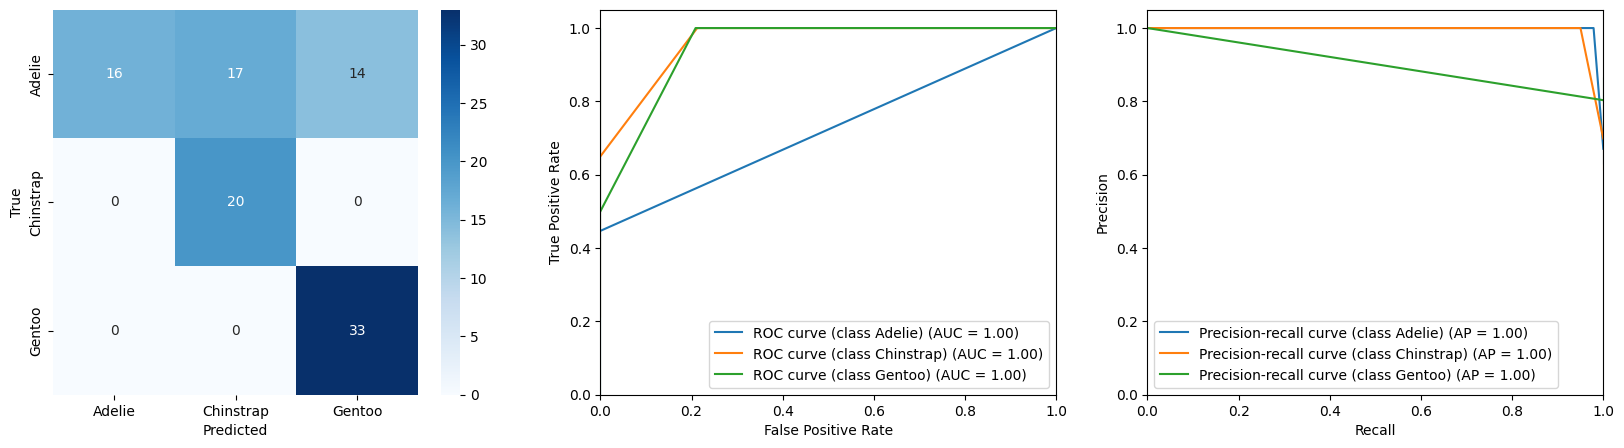

In [72]:
classificator_analysis(model=model_GNB, X_test=X_test, y_test=y_test, labels_name=target_classes)

In [73]:
classificator_performance(model_DTC, X_train, y_train, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        99
   Chinstrap       1.00      1.00      1.00        48
      Gentoo       1.00      1.00      1.00        86

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [74]:
classificator_performance(model_DTC, X_test, y_test, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        47
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



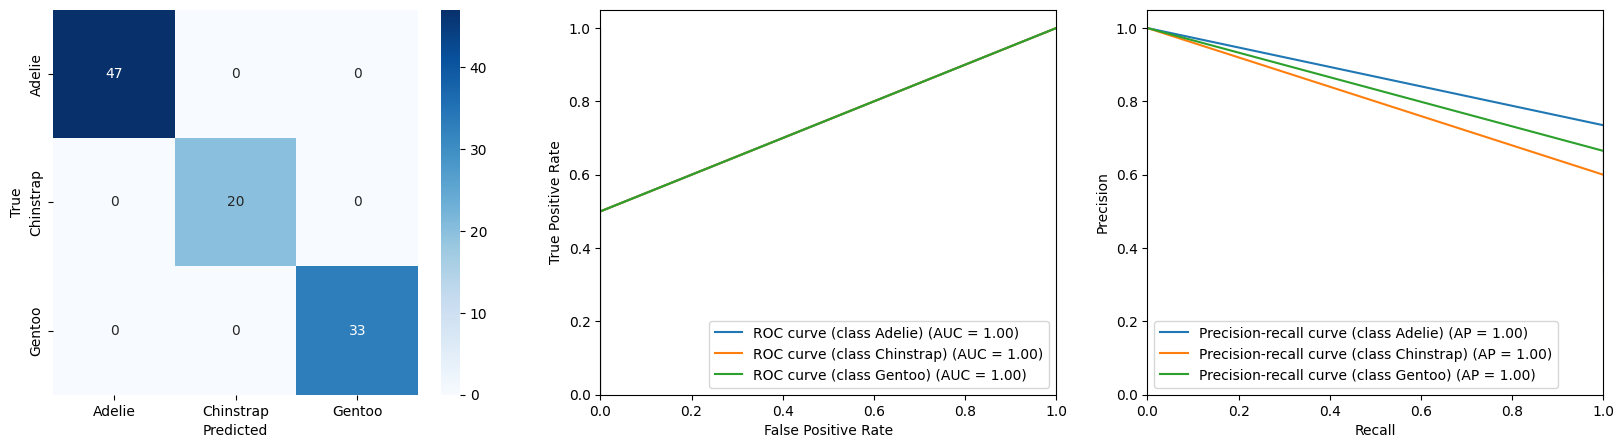

In [75]:
classificator_analysis(model=model_DTC, X_test=X_test, y_test=y_test, labels_name=target_classes)

In [76]:
classificator_performance(model_RFC, X_train, y_train, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        99
   Chinstrap       1.00      1.00      1.00        48
      Gentoo       1.00      1.00      1.00        86

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [77]:
classificator_performance(model_RFC, X_test, y_test, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        47
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



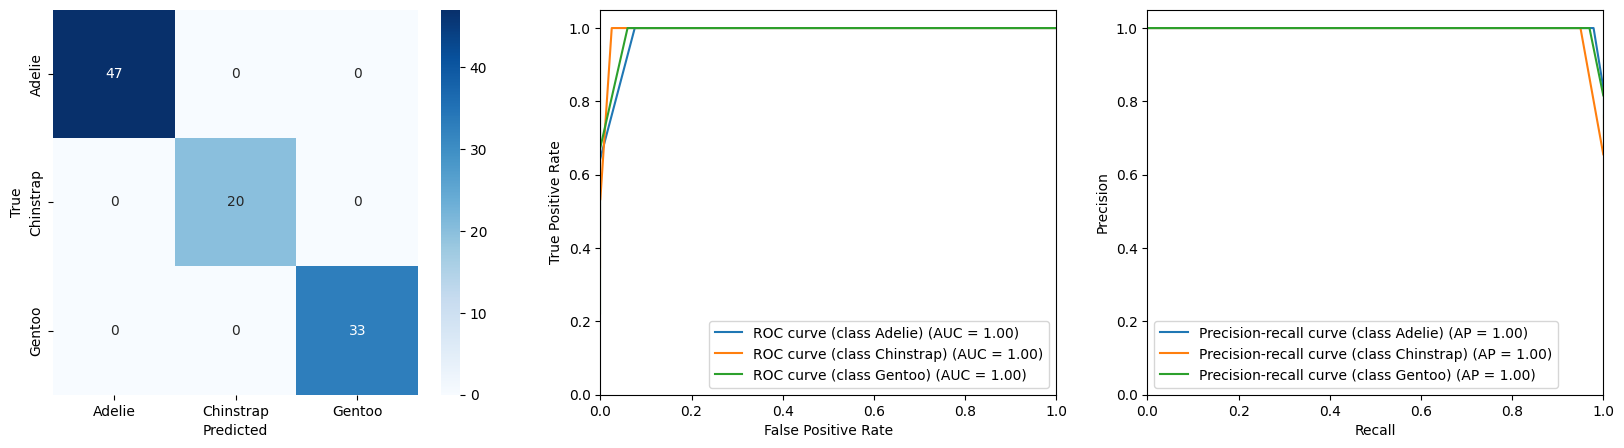

In [78]:
classificator_analysis(model=model_RFC, X_test=X_test, y_test=y_test, labels_name=target_classes)

In [79]:
classificator_performance(model_MLPC, X_train, y_train, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        99
   Chinstrap       1.00      1.00      1.00        48
      Gentoo       1.00      1.00      1.00        86

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [80]:
classificator_performance(model_MLPC, X_test, y_test, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        47
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



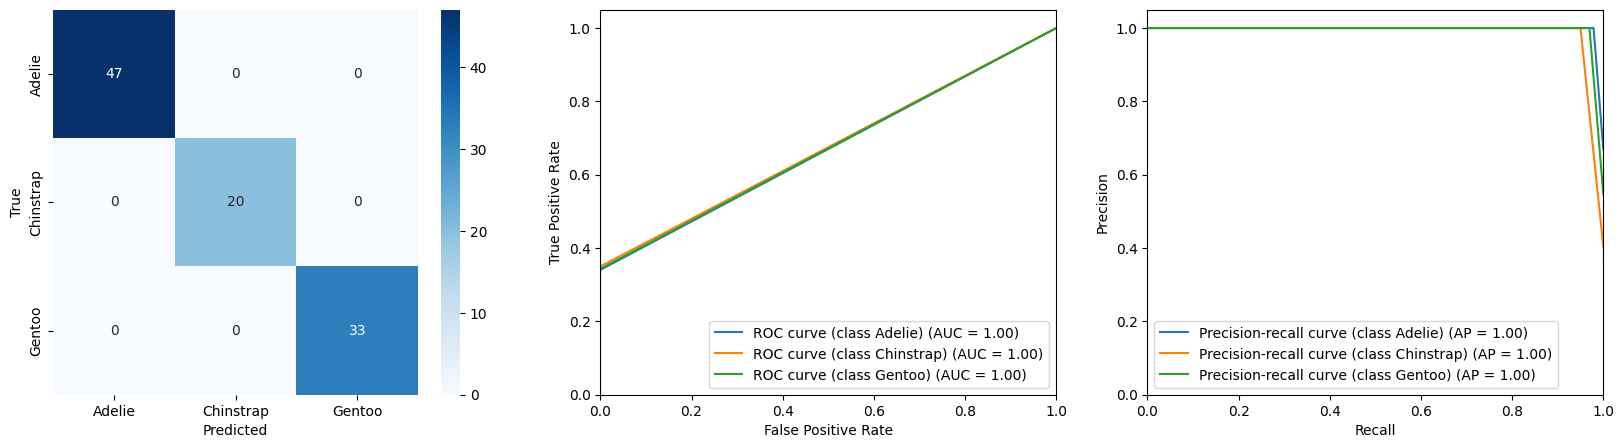

In [81]:
classificator_analysis(model=model_MLPC, X_test=X_test, y_test=y_test, labels_name=target_classes)

In [82]:
classificator_performance(model_ABC, X_train, y_train, target_classes.values())

              precision    recall  f1-score   support

      Adelie       0.68      0.98      0.80        99
   Chinstrap       0.60      0.06      0.11        48
      Gentoo       1.00      1.00      1.00        86

    accuracy                           0.80       233
   macro avg       0.76      0.68      0.64       233
weighted avg       0.78      0.80      0.73       233



In [83]:
classificator_performance(model_ABC, X_test, y_test, target_classes.values())

              precision    recall  f1-score   support

      Adelie       0.71      0.96      0.82        47
   Chinstrap       1.00      0.05      0.10        20
      Gentoo       0.92      1.00      0.96        33

    accuracy                           0.79       100
   macro avg       0.88      0.67      0.62       100
weighted avg       0.84      0.79      0.72       100



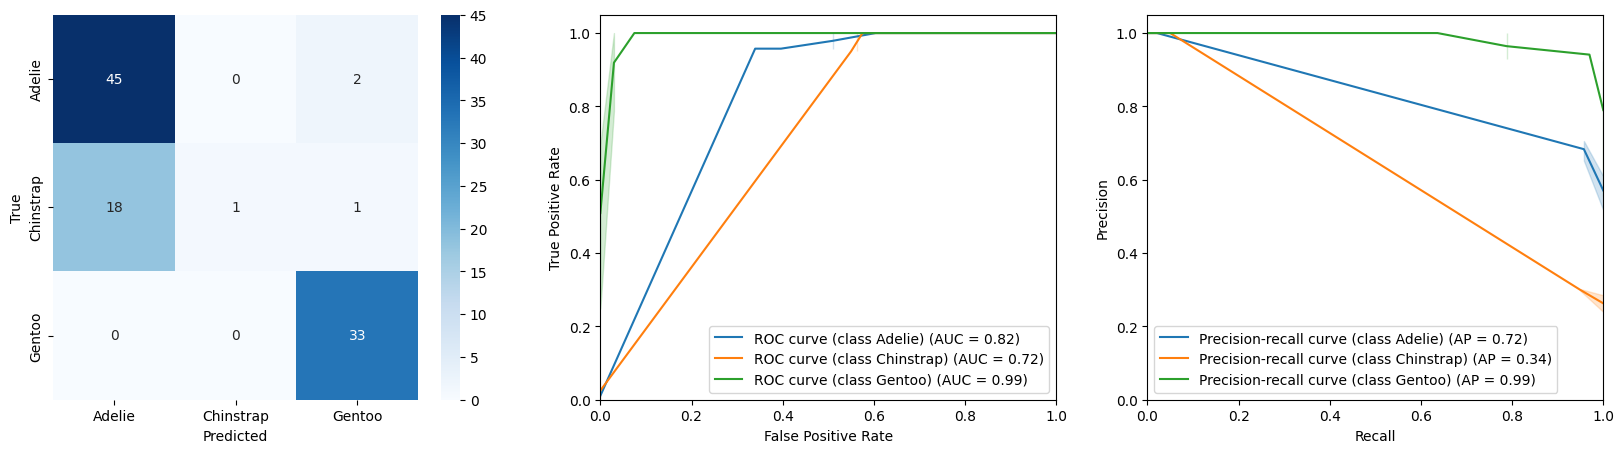

In [84]:
classificator_analysis(model=model_ABC, X_test=X_test, y_test=y_test, labels_name=target_classes)

In [85]:
classificator_performance(model_GBC, X_train, y_train, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        99
   Chinstrap       1.00      1.00      1.00        48
      Gentoo       1.00      1.00      1.00        86

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [86]:
classificator_performance(model_GBC, X_test, y_test, target_classes.values())

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        47
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



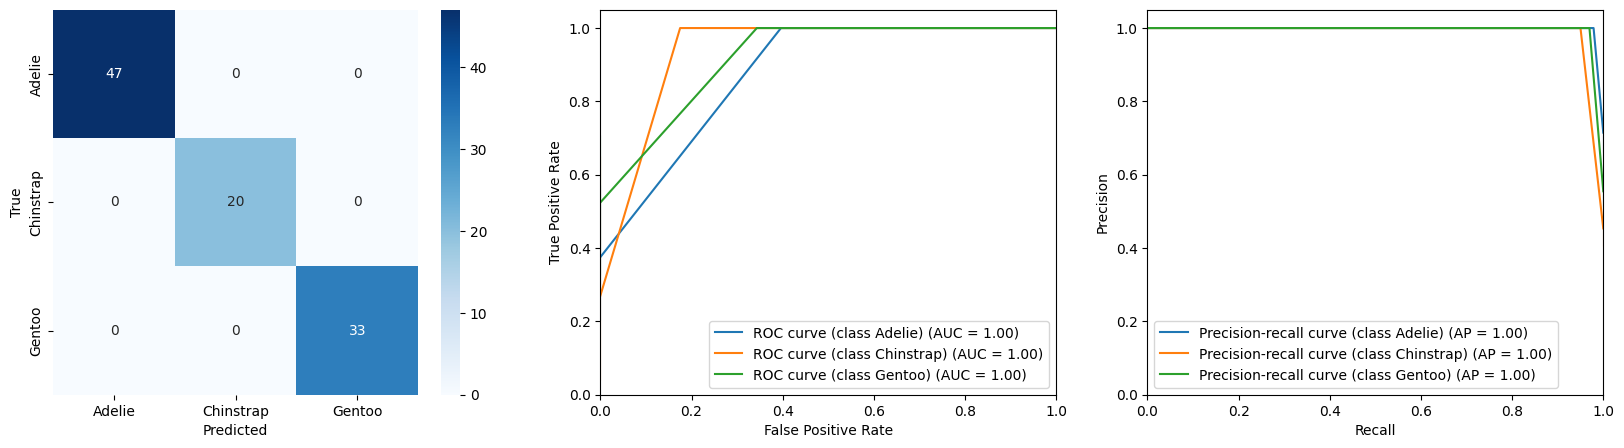

In [87]:
classificator_analysis(model=model_GBC, X_test=X_test, y_test=y_test, labels_name=target_classes)

In [88]:
classificator_performance(model_DC, X_train, y_train, target_classes.values())

              precision    recall  f1-score   support

      Adelie       0.45      0.45      0.45        99
   Chinstrap       0.22      0.23      0.22        48
      Gentoo       0.36      0.34      0.35        86

    accuracy                           0.36       233
   macro avg       0.34      0.34      0.34       233
weighted avg       0.37      0.36      0.37       233



In [89]:
classificator_performance(model_DC, X_test, y_test, target_classes.values())

              precision    recall  f1-score   support

      Adelie       0.46      0.36      0.40        47
   Chinstrap       0.25      0.25      0.25        20
      Gentoo       0.40      0.52      0.45        33

    accuracy                           0.39       100
   macro avg       0.37      0.38      0.37       100
weighted avg       0.40      0.39      0.39       100



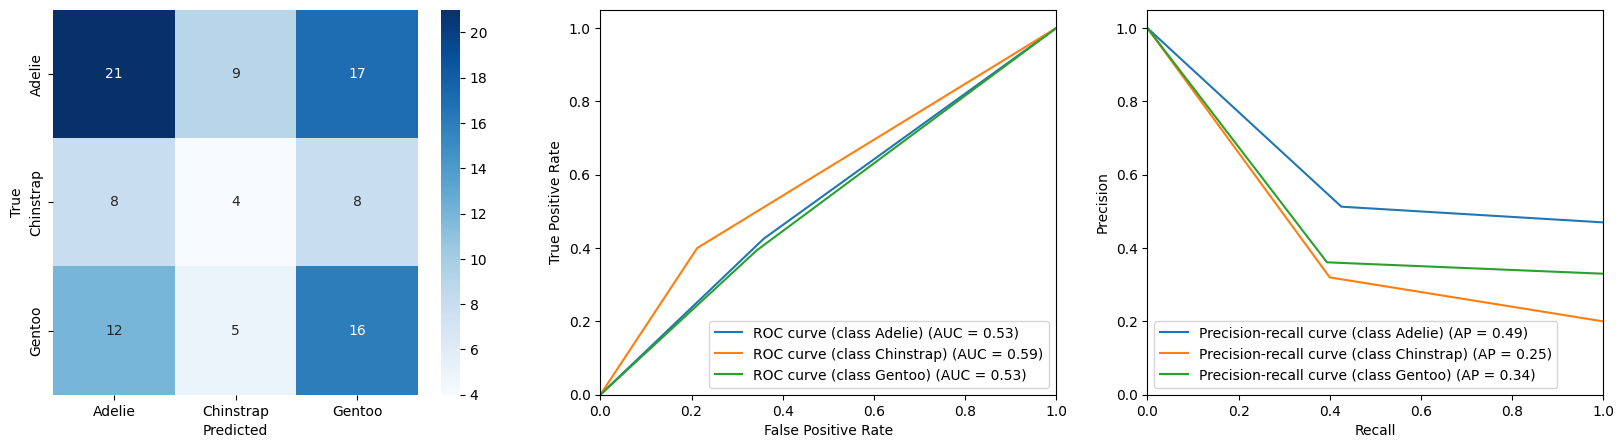

In [90]:
classificator_analysis(model=model_DC, X_test=X_test, y_test=y_test, labels_name=target_classes)

#  Features importance analysis

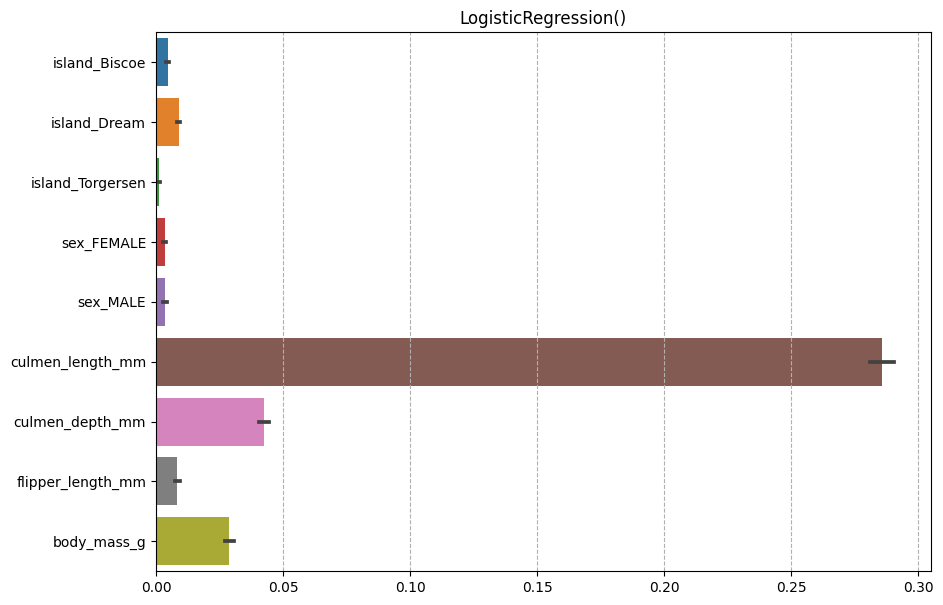

In [91]:
features_importance(model_LG, X_train, y_train, 100)

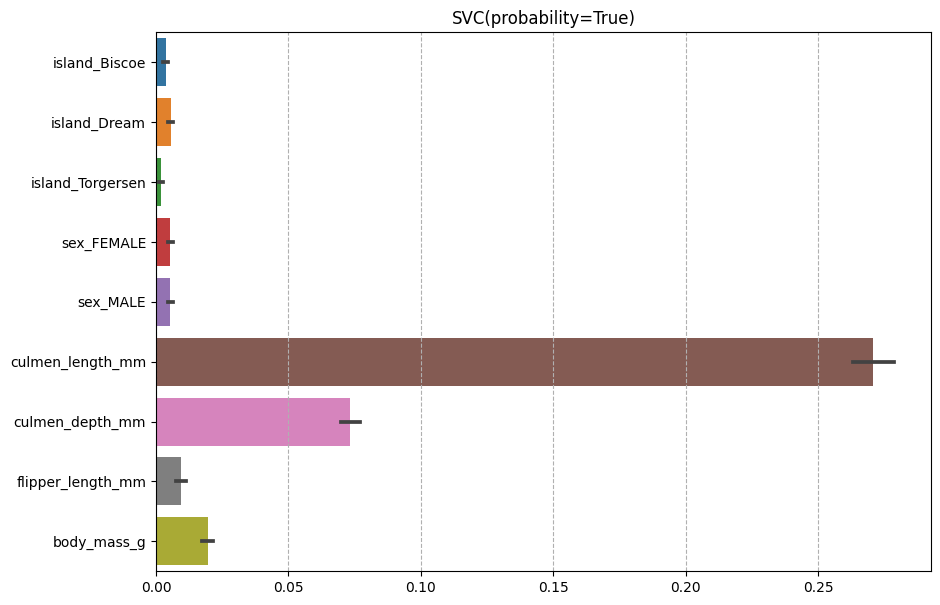

In [92]:
features_importance(model_SVC, X_test, y_test, 100)

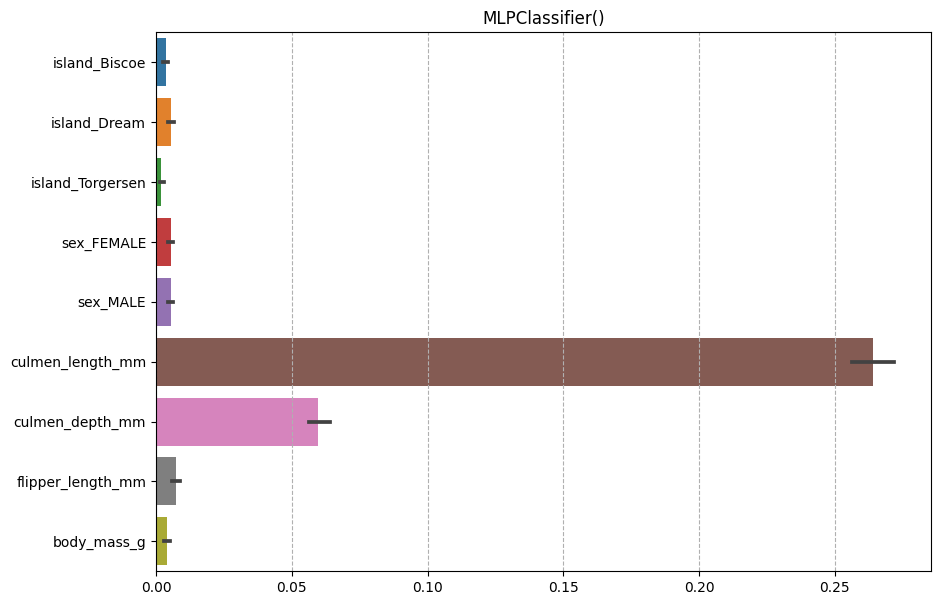

In [93]:
features_importance(model_MLPC, X_test, y_test, 100)

# Cross validation model analysis

test accuracy score: worst=0.8, best=1.0, avarage=0.99
train accuracy score: worst=0.989, best=1.0, avarage=0.995


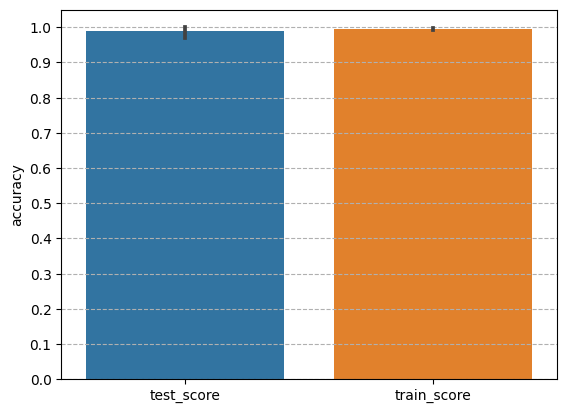

In [94]:
cross_validation(model_LG, X_test, y_test, cv=20)

test accuracy score: worst=0.8, best=1.0, avarage=0.99
train accuracy score: worst=0.989, best=1.0, avarage=0.999


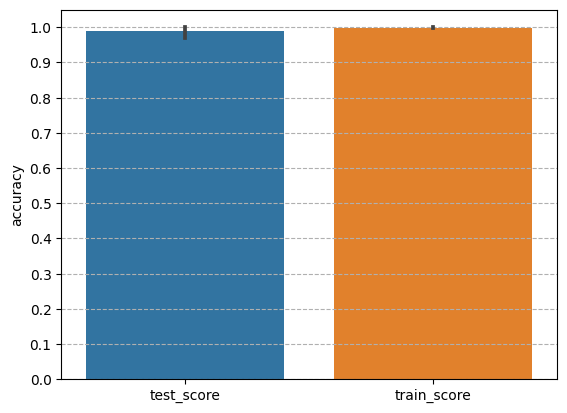

In [95]:
cross_validation(model_SVC, X_test, y_test, cv=20)